Variables

$P = R - C$

$R = 1500 N$

$C = r N$

$N = n_0 \left (1+\frac{0.15r}{100} \right )$

$P = n_0 \left (1+\frac{0.15r}{100} \right ) \left (1500\right ) - r n_0 \left (1+\frac{0.15r}{100} \right )$

$P = n_0 \left (1500-r \right )\left (1+\frac{0.15r}{100} \right )$

Assumptions

$r \in \left [0, 1500 \right ]$

In [2]:
def f(x):
    return (1500 - x) * (1 + 0.15 * x / 100)

def f_flipped(x):
    return -1 * f(x)

In [3]:
from scipy.optimize import minimize_scalar
import numpy as np

In [4]:
res = minimize_scalar(f_flipped, bounds = (0, 1500), method='bounded')
print(res)

     fun: -1760.4166666666667
 message: 'Solution found.'
    nfev: 6
  status: 0
 success: True
       x: 416.6666666666671


Since we are trying to maximize profits, we need to find the minimum of the flipped function since scipy only offers minimization functions.

In [5]:
import sympy as sym

In [6]:
x, y = sym.symbols('x y')

expr = x + 2*y
expr

x + 2*y

In [7]:
expr + 1

x + 2*y + 1

In [8]:
expr - x

2*y

In [9]:
sym.expand(x * expr)

x**2 + 2*x*y

In [10]:
x, t, z, nu = sym.symbols('x t z nu')

In [11]:
sym.init_printing(use_unicode=True)

In [12]:
dx = sym.diff(sym.sin(x)*sym.exp(x), x)
dx

In [13]:
sym.integrate(dx, x)

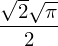

In [14]:
sym.integrate(sym.sin(x**2), (x, -sym.oo, sym.oo))

In [15]:
sym.limit(sym.sin(x) / x, x, 0)

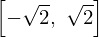

In [16]:
sym.solve(x**2 - 2, x)

In [17]:
y = sym.Function('y')

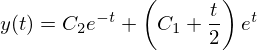

In [18]:
sym.dsolve(sym.Eq(y(t).diff(t, t) - y(t), sym.exp(t)), y(t))

In [19]:
n, r = sym.symbols('n r')

P = (n * (1500 - r) * (1 + 0.15 * r / 100))

In [20]:
P

In [21]:
sym.solve(sym.diff(P, r), r)

In [22]:
D = sym.Interval(0, 1500)

In [23]:
D

In [24]:
res = sym.solveset(sym.diff(P, r), r, D)
res.args[0]

In [25]:
P.subs(r, res.args[0])

In [26]:
n, r = sym.symbols('n r', positive=True)

In [27]:
P = (n * (1500 - r) * (1 + 0.15 * r / 100))

In [28]:
res = sym.solveset(sym.diff(P, r), r, D)
res.args[0]

In [29]:
P.diff(r).diff(r) < 0

In [30]:
P

In [31]:
x = sym.symbols('x', real=True)

In [32]:
E = sym.Eq(sym.sqrt(x-4), -x**2/2 + 10)

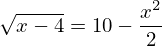

In [33]:
E

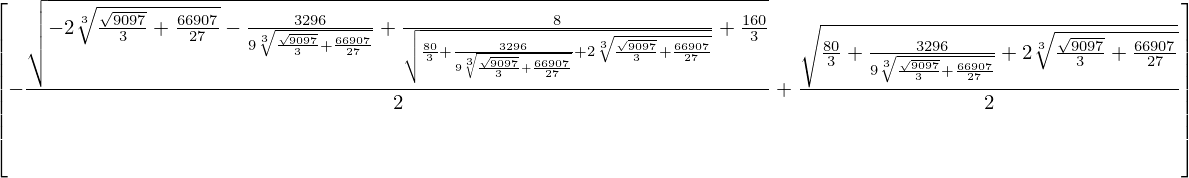

In [34]:
res = sym.solve(E, x)
res

In [34]:
res[0].evalf()

$$\frac{f(x+h)-f(x-h)}{2h} \cdot \frac{f(x)}{x}$$